<a href="https://colab.research.google.com/github/SwatiMishra01/Smart-watch-pred-using-Linear-regression/blob/main/Smart_Watches_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
data= pd.read_csv("archive.zip")
data

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Withings,ScanWatch,Withings OS,"Bluetooth, Wi-Fi",PMOLED,1.38,348 x 442,50,30,Yes,No,Yes,$279
375,Zepp,Z,Zepp OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.39,454 x 454,50,15,Yes,Yes,Yes,$349
376,Honor,Watch GS Pro,Lite OS,"Bluetooth, Wi-Fi",AMOLED,1.39,454 x 454,50,25,Yes,Yes,Yes,$249
377,Oppo,Watch Free,ColorOS,"Bluetooth, Wi-Fi",AMOLED,1.64,326 x 326,50,14,Yes,No,Yes,$159


In [4]:
data.shape

(379, 13)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [7]:
data['Price (USD)'] = data['Price (USD)'].str.replace('$', '')
data['Price (USD)'] = data['Price (USD)'].str.replace(',', '')

In [8]:
data['Price (USD)'] = data['Price (USD)'].astype(float)

In [9]:
data['Price (USD)']

,Price (USD)
0,399.0
1,249.0
2,399.0
3,229.0
4,299.0
...,...
374,279.0
375,349.0
376,249.0
377,159.0


# **DISTRIBUTION OF PRICES-NORMAL/SKEWED**
                         (Mean, Median, Range)

Text(0.5, 0, 'Price of smart watch (in USD)')

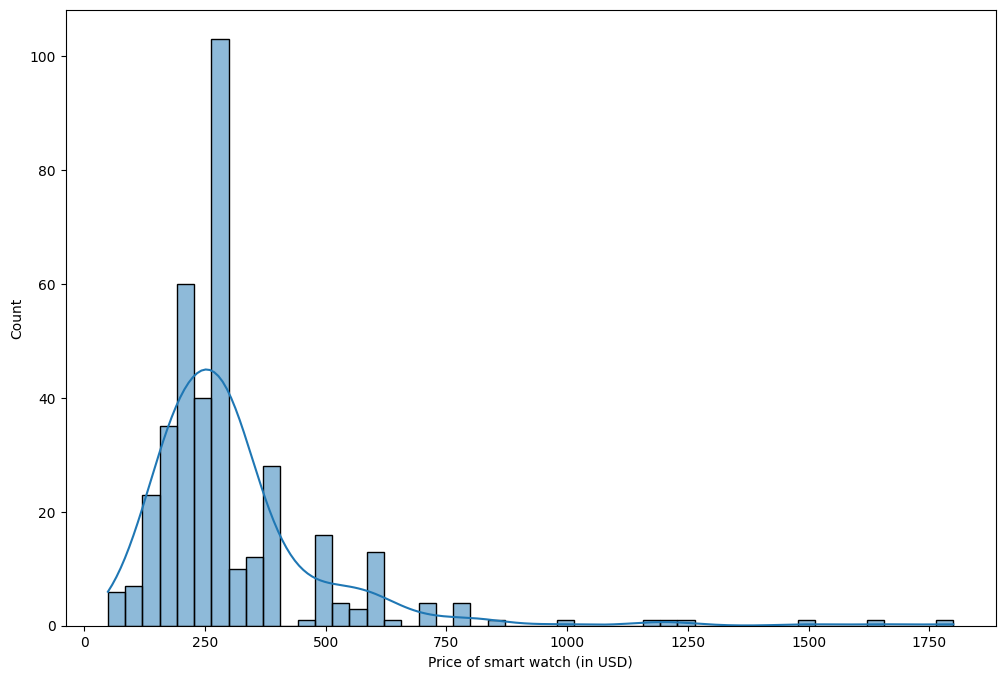

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(data['Price (USD)'], bins=49, kde = True)
plt.xlabel("Price of smart watch (in USD)")

In [11]:
import numpy as np
import pandas as pd
df = pd.read_csv('archive.zip')
df['Price (USD)'] = df['Price (USD)'].str.replace(r'[$,]', '')
df['Price (USD)'] = df['Price (USD)'].str.strip()
df['Price (USD)'] = df['Price (USD)'].str.extract(r'(\d+\.?\d*)').astype(float)
df.to_csv('archive_modified.zip', compression='zip', index=False)

In [12]:
price_skewness = df['Price (USD)'].skew()
if abs(price_skewness) < 0.5:
    distribution = "approximately normally distributed"
else:
    distribution = "skewed"
print('price distribution:',distribution)

price distribution: skewed


In [15]:
MEAN=data['Price (USD)'].mean()
print('Mean:',MEAN)

MEDIAN=data['Price (USD)'].median()
print('Median:',MEDIAN)

MAX=data['Price (USD)'].max()
print('Maximum:',MAX)

MIN=data['Price (USD)'].min()
print('Minimum:',MIN)

RANGE=MAX-MIN
print('Range:',RANGE)

Mean: 312.9470899470899
Median: 279.0
Maximum: 1800.0
Minimum: 49.0
Range: 1751.0


**SUMMARY**

*   The above histogram shows that the distribution of smart watch prices is positively skewed.
*   The mean  price of smart watches is 312.94  dollars.

*   The meadian  price of smart watches is 279  dollars.
*   The price of these smart watches ranges from 49 to 1800 dollars.





# **Relationship between the display size and the price of smartwatches-CORRELATION**

In [16]:
data['Display Size (inches)'] = pd.to_numeric(data['Display Size (inches)'], errors='coerce')
data['Price (USD)'] = pd.to_numeric(data['Price (USD)'], errors='coerce')

correlation = data['Display Size (inches)'].corr(data['Price (USD)'])

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.027153112279149523


Text(0, 0.5, 'Price (USD)')

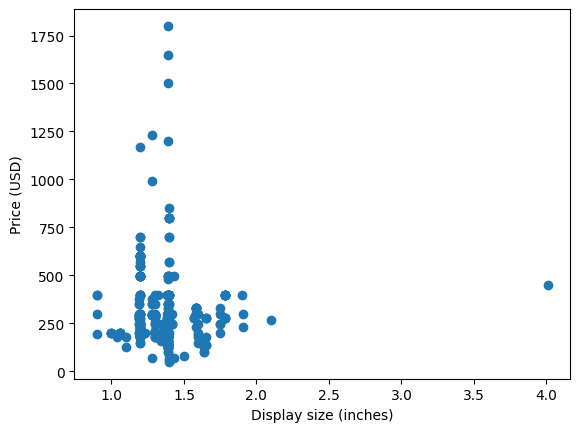

In [17]:
plt.scatter(data['Display Size (inches)'], data['Price (USD)'])
plt.xlabel("Display size (inches)")
plt.ylabel("Price (USD)")

We get a negative correlation coefficient of -0.027 between display size and price of the smart watches i.e. the prices decrease with increase in display size.

# **OS impacting the price of smartwatches**
 Comparing the average prices for different operating systems using a suitable plot

In [18]:
data['Operating System'].value_counts()

,count
Operating System,
Wear OS,131
Garmin OS,34
Lite OS,26
Fitbit OS,24
Amazfit OS,19
watchOS,14
Tizen OS,14
Proprietary OS,12
Polar OS,11


In [20]:
avg_prices = data.groupby('Operating System')['Price (USD)'].mean().sort_values()
avg_prices

,Price (USD)
Operating System,
Mi Wear OS,49.000000
MIUI For Watch,99.000000
Timex OS,141.500000
Amazfit OS,156.894737
RTOS,159.000000
MIUI for Watch,159.500000
Realme OS,164.000000
Proprietary OS,192.333333
Hybrid OS,195.000000


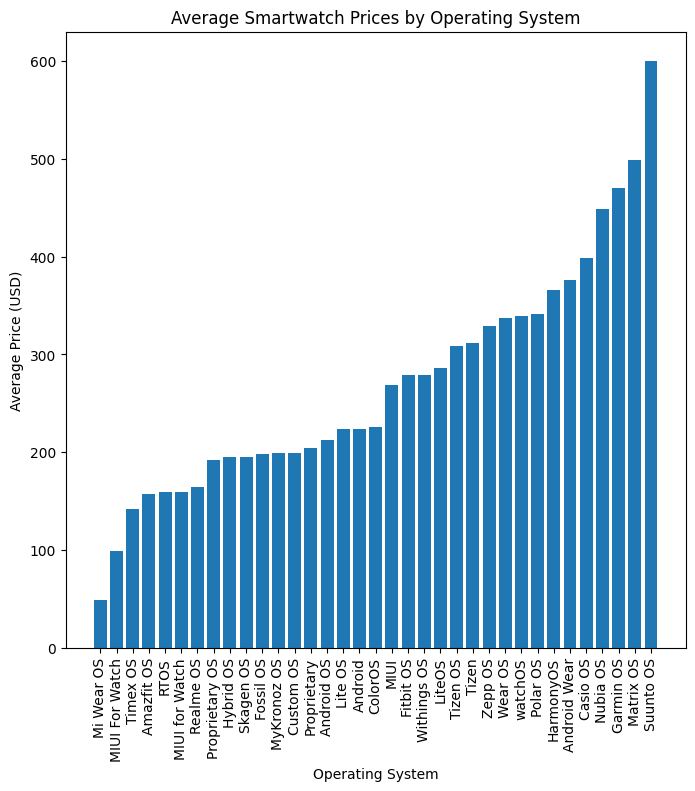

In [21]:
plt.figure(figsize=(8,8))
plt.bar(avg_prices.index, avg_prices.values)
plt.xlabel('Operating System')
plt.ylabel('Average Price (USD)')
plt.title('Average Smartwatch Prices by Operating System')
plt.xticks(rotation=90)
plt.show()

# **Presence of specific features, such as GPS, NFC, or a heart rate monitor, affecting the price of smartwatches?**

analyzing the average prices for smartwatches with and without these features to determine if there are significant differences

In [22]:
gps_prices = data.groupby('GPS')['Price (USD)'].mean()
print("Average prices with and without GPS:")
print(gps_prices)

Average prices with and without GPS:
GPS
No     165.933333
Yes    325.620690
Name: Price (USD), dtype: float64


In [23]:
nfc_prices = data.groupby('NFC')['Price (USD)'].mean()
print("Average prices with and without NFC:")
print(nfc_prices)

Average prices with and without NFC:
NFC
No     295.754098
Yes    316.255521
Name: Price (USD), dtype: float64


In [24]:
heart_rate_prices = data.groupby('Heart Rate Monitor')['Price (USD)'].mean()
print("Average prices with and without a heart rate monitor:")
print(heart_rate_prices)

Average prices with and without a heart rate monitor:
Heart Rate Monitor
Yes    312.94709
Name: Price (USD), dtype: float64


**SUMMARY->**


*   ✅ GPS is associated with higher-priced smartwatches.
*   ✅ NFC increases the average price slightly, but the effect is smaller than GPS.
* ✅ No watches without a heart rate monitor exist in this dataset.



# **identifying the top brands in terms of average smartwatch prices**

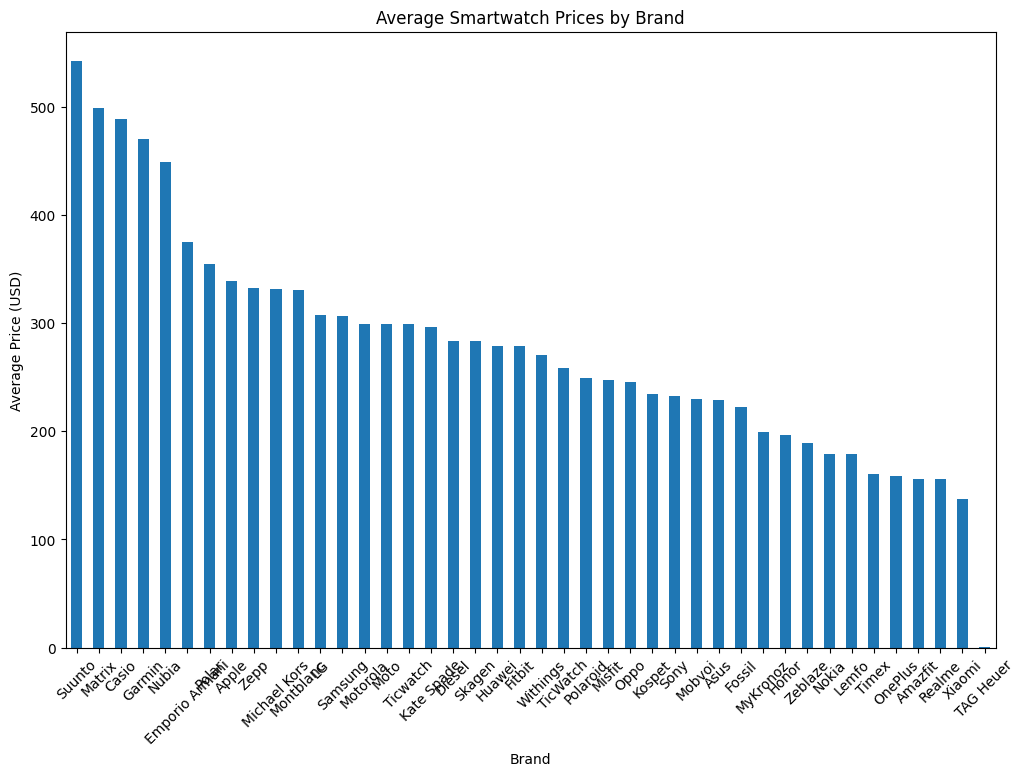

Top Brands by Average Price:
Brand
Suunto    542.125000
Matrix    499.000000
Casio     489.000000
Garmin    469.882353
Nubia     449.000000
Name: Price (USD), dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
avg_prices_by_brand = df.groupby('Brand')['Price (USD)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,8))
avg_prices_by_brand.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.title('Average Smartwatch Prices by Brand')
plt.xticks(rotation=45)
plt.show()
top_brands = avg_prices_by_brand.head(5)
print("Top Brands by Average Price:")
print(top_brands)

**Summary**

* This code calculates the average smartwatch price for each brand,
* Plots a bar chart for visualization,
* identifies the top 5 most expensive brands.

# **Classification/Regression**

*  Split dataset in train-test

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('Price (USD)', axis=1)
y = df['Price (USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(        Brand                 Model Operating System  \
 137    Huawei        Watch GT 2 Pro           LiteOS   
 101     Apple              Watch SE          watchOS   
 202    Suunto                9 Peak        Suunto OS   
 198    Garmin               Venu Sq        Garmin OS   
 224    Garmin                Enduro        Garmin OS   
 ..        ...                   ...              ...   
 71   TicWatch                 Pro 3          Wear OS   
 106   Amazfit                 GTR 2       Amazfit OS   
 270    Mobvoi           TicWatch E3          Wear OS   
 348    Mobvoi        TicWatch Pro 3          Wear OS   
 102   Samsung  Galaxy Watch Active2            Tizen   
 
                    Connectivity   Display Type  Display Size (inches)  \
 137            Bluetooth, Wi-Fi         AMOLED                   1.39   
 101  Bluetooth, Wi-Fi, Cellular         Retina                   1.57   
 202            Bluetooth, Wi-Fi  Transflective                   1.40   
 198            Bl

* model selection

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

* model training

In [28]:
import pandas as pd
df = pd.read_csv("archive_modified.zip")
model_mapping = {
    'Watch Series 7': 1,
    'Amazfit GTS 2': 2,}
df['Model'] = df['Model'].map(model_mapping)
df['Model'] = df['Model'].astype(float)
df.to_csv('archive_modified.zip')
print(df)

        Brand  Model Operating System                Connectivity  \
0       Apple    1.0          watchOS  Bluetooth, Wi-Fi, Cellular   
1     Samsung    NaN          Wear OS  Bluetooth, Wi-Fi, Cellular   
2      Garmin    NaN        Garmin OS            Bluetooth, Wi-Fi   
3      Fitbit    NaN        Fitbit OS            Bluetooth, Wi-Fi   
4      Fossil    NaN          Wear OS            Bluetooth, Wi-Fi   
..        ...    ...              ...                         ...   
374  Withings    NaN      Withings OS            Bluetooth, Wi-Fi   
375      Zepp    NaN          Zepp OS  Bluetooth, Wi-Fi, Cellular   
376     Honor    NaN          Lite OS            Bluetooth, Wi-Fi   
377      Oppo    NaN          ColorOS            Bluetooth, Wi-Fi   
378  TicWatch    NaN          Wear OS  Bluetooth, Wi-Fi, Cellular   

    Display Type  Display Size (inches) Resolution Water Resistance (meters)  \
0         Retina                   1.90  396 x 484                        50   
1         A

* Fine tune the model

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1,]}
param_grid

{'alpha': [0.1]}

* Feature engineering

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Brand', 'Model', 'Operating System', 'Connectivity', 'Display Type', 'Heart Rate Monitor', 'GPS', 'NFC']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [35]:
 data.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,1,127,34,2,17,1.90,396 x 484,50,18,0,1,1,399.0
1,30,36,31,2,0,1.40,450 x 450,50,40,0,1,1,249.0
2,8,105,9,1,0,1.30,416 x 416,50,11,0,1,0,399.0
3,6,109,7,1,0,1.58,336 x 336,50,6,0,1,1,229.0
4,7,43,31,1,0,1.28,416 x 416,30,24,0,1,1,299.0


* Data preprocessing

In [36]:
import pandas as pd
df = pd.read_csv('archive_modified.zip')
print(df.isnull().sum())

Unnamed: 0                     0
Brand                          1
Model                        378
Operating System               3
Connectivity                   1
Display Type                   2
Display Size (inches)          3
Resolution                     4
Water Resistance (meters)      1
Battery Life (days)            1
Heart Rate Monitor             1
GPS                            1
NFC                            1
Price (USD)                    1
dtype: int64


✅ Summary
Why Linear Regression may not work well here

Linear Regression assumes numeric features have a linear relationship with the target.

High-cardinality categorical features like Model or Brand become numeric after encoding, but Linear Regression interprets them as continuous numbers → the relationship is not meaningful, so predictions may be poor.

Linear Regression can be used as a baseline.

But for better accuracy, especially with categorical features and non-linear patterns, tree-based models like Random Forest or Gradient Boosting are preferable.